# Average Luminosity SED
## version 2023

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import uncertainties as uncer
import uncertainties.umath as umath
from astropy import units as u
from scipy.optimize import curve_fit
%matplotlib widget


In [2]:
path = "/Users/87steven/Documents/ASIAA/Blazar SED code and data/source individual luminosity"
dir_list = os.listdir(path) 

dir_list = set(dir_list)
dir_list.remove('.DS_Store')
dir_list = sorted(dir_list)

dir_list_name = []
for i in range(0, len(dir_list)):
    dir_list_name.append(dir_list[i][0:10])
        

In [3]:
### read in source list
table = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/data/BZCAT_Xmatch_ACC_list.csv')

table_name = table.name.values
table_class = table.Class.values
table_z = table.z.values

### redshift classification
table_z[table_z == 0] = np.nan
z_gt_0_index = np.where(table_z > 0)[0]
z_lt_1_5_index = np.where((0 < table_z) & (table_z < 1.5))[0]
z_gt_1_5_index = np.where(table_z >= 1.5)[0]

class_list = [' Blazar Uncertain type', ' BL Lac Candidate', ' BL Lac-galaxy dominated', ' QSO RLoud flat radio sp.', ' BL Lac']

QSO_index = []
BL_Lac_can_index = []
BL_Lac_galaxy_dom_index = []
BL_Lac_index = []
Blazar_index = []
data_class_index = [Blazar_index, BL_Lac_can_index, BL_Lac_galaxy_dom_index, QSO_index, BL_Lac_index]

for j in range(0, 5): 
    data_class_index[j] = np.where( table_class == class_list[j] )[0]
    
BL_Lac_index =  list( set(np.hstack([data_class_index[1], data_class_index[2], data_class_index[4]])) & set(z_gt_0_index) )
lowz_QSO_index = list( set(data_class_index[3]) & set(z_lt_1_5_index) )
highz_QSO_index = list( set(data_class_index[3]) & set(z_gt_1_5_index) )   

BL_Lac_name =  table_name[ BL_Lac_index ]
lowz_QSO_name = table_name[ lowz_QSO_index ]
highz_QSO_name = table_name[ highz_QSO_index ]


In [4]:
### frequency interval
nu_interval = [0, 3.0E8, 3.0E10, 3.0E12, 3.0E14, 3.0E16, 3.0E18, 3.0E20, 3.0E22, 3.0E24, 3.0E27, 3.0E30]

def average_luminosity(input_name):
    input_name_overlap = list( set(dir_list_name) & set(input_name) )

    freq_array = []
    L_array = []
    L_err_array = []
    for i in range(0, len(input_name_overlap)):

        table = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/source individual luminosity/'+input_name_overlap[i]+'.csv')

        table_freq = table.freq.values
        table_L = table.L.values
        table_L_err = table.L_err.values

        freq_array.append( table_freq )
        L_array.append( table_L )
        L_err_array.append( table_L_err )

    freq_array = np.array([item for sublist in freq_array for item in sublist])
    L_array = np.array([item for sublist in L_array for item in sublist])
    L_err_array = np.array([item for sublist in L_err_array for item in sublist])

    average_L = []
    average_L_err = []
    for k in range(0, len(nu_interval)-1):
        #print(k)
        index = np.where((nu_interval[k] < freq_array) & (freq_array < nu_interval[k+1]))[0]

        uncer_array = [0]*len(index)
        for j in range(0, len(index)):
            uncer_array[j] = uncer.ufloat(L_array[index][j], L_err_array[index][j]) 

        if len(uncer_array) > 1:
            average_L.append( np.mean(uncer_array).n )
            average_L_err.append( np.mean(uncer_array).s )
        else:
            average_L.append(np.nan )
            average_L_err.append( np.nan )
    return average_L, average_L_err
        
average_L, average_L_err = average_luminosity(BL_Lac_name)
BLO_average_L = np.array(average_L)
BLO_average_L_err = np.array(average_L_err)

average_L, average_L_err = average_luminosity(lowz_QSO_name)
lowz_QSO_average_L = np.array(average_L)
lowz_QSO_average_L_err = np.array(average_L_err)

average_L, average_L_err = average_luminosity(highz_QSO_name)
highz_QSO_average_L = np.array(average_L)
highz_QSO_average_L_err = np.array(average_L_err)



(array([42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

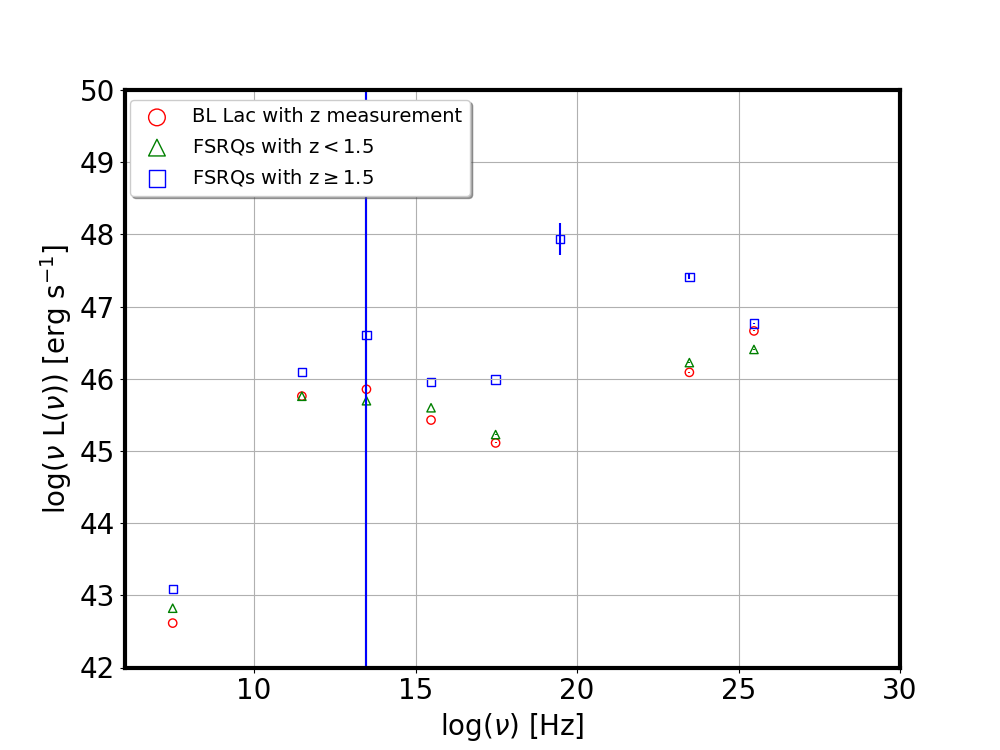

In [5]:
plot_nu = [3.0E7, 3.0E9, 3.0E11, 3.0E13, 3.0E15, 3.0E17, 3.0E19, 3.0E21, 3.0E23, 3.0E25, 3.0E27]

plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.linewidth'] = 3
fig, ax = plt.subplots()

ax.scatter(np.log10(plot_nu), np.log10(BLO_average_L), marker =  'o', facecolor = 'none', edgecolors = 'red', label = 'BL Lac with z measurement')
ax.scatter(np.log10(plot_nu), np.log10(lowz_QSO_average_L), marker =  '^', facecolor = 'none', edgecolors = 'green', label = 'FSRQs with z$<$1.5')
ax.scatter(np.log10(plot_nu), np.log10(highz_QSO_average_L), marker =  's', facecolor = 'none', edgecolors = 'blue', label = 'FSRQs with z$\geq$1.5')

ax.errorbar(np.log10(plot_nu), np.log10(BLO_average_L), yerr = 0.434*BLO_average_L_err/BLO_average_L, ecolor = "red", linestyle = '')
ax.errorbar(np.log10(plot_nu), np.log10(lowz_QSO_average_L), yerr = 0.434*lowz_QSO_average_L_err/lowz_QSO_average_L, ecolor = "green", linestyle = '')
ax.errorbar(np.log10(plot_nu), np.log10(highz_QSO_average_L), yerr = 0.434*highz_QSO_average_L_err/highz_QSO_average_L, ecolor = "blue", linestyle = '')

ax.grid(True)
ax.set_xlim (6, 30)
ax.set_ylim (42, 50)
fig.legend(loc = 'upper left', bbox_to_anchor = (0.12, 0.88), shadow = True, fontsize = 14, markerscale = 2) 

plt.xlabel( "log($\\nu$) [Hz]",  fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('log($\\nu$ L($\\nu$)) [$\mathrm{erg \ s^{-1}}$]',  fontsize = 20)
plt.yticks(fontsize = 20)

